In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
quote = Quote(screen_funds('Industries'), 60, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

from 2019-05-15 to 2019-07-12 - 62


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

59


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
GDX,36,3.238684,4.276119,0.748109,26.070216,6.075660
GDXJ,36,3.027205,4.790478,0.623638,23.696029,6.657301
IHI,36,1.371340,1.906085,0.698635,9.378518,2.045544
ARKK,36,1.294995,3.990056,0.314610,7.521632,11.351589
RYT,36,1.060692,2.521839,0.404867,8.341917,6.454069
XLK,36,0.989896,2.724161,0.348810,8.136362,7.053556
QTEC,36,0.975273,3.120135,0.299856,6.781604,9.077956
XLB,36,0.974823,2.784462,0.335843,8.297829,4.056015
XAR,36,0.967289,1.788152,0.518752,9.053498,2.376372


evicted EMLP 0.860 0.158
evicted IGF 0.887 0.320
evicted BOTZ 0.830 0.039
evicted FXU 0.891 0.032
evicted XLI 0.897 0.313
evicted IXN 0.870 0.055
evicted XLU 0.688 -0.064
evicted ITB 0.819 -0.026
evicted XLP 0.818 0.080
evicted XLB 0.737 0.056
evicted XLY 0.827 -0.006
evicted XLE 0.782 0.299
evicted HACK 0.890 -0.268
evicted GUNR 0.733 0.332
evicted AMLP 0.753 -0.022
evicted XAR 0.734 0.317
evicted SOXX 0.777 0.235
evicted XBI 0.685 0.017
evicted ARKK 0.762 -0.048
evicted XLF 0.677 -0.088
retry backlogs ['FXL', 'VAW', 'VOX', 'TDIV', 'IYF', 'IYW', 'VGT', 'IGM', 'QTEC', 'VCR', 'FTEC', 'VHT', 'GNR', 'FHLC', 'KBE', 'VPU', 'XT', 'FNCL', 'VFH', 'VDC', 'FBT', 'VIS', 'IYH', 'IXJ', 'XLK', 'RYT', 'FDN', 'XLV', 'SKYY', 'IGV', 'FXH', 'IBB', 'GDXJ', 'ITA', 'IYG', 'KRE'] at 0.905/-0.51 - 0.939
evicted FDN 0.904 -0.226
evicted ITA 0.682 0.309
evicted VPU 0.702 0.242
evicted VDC 0.825 0.052
evicted GNR 0.759 0.404
evicted IXJ 0.900 0.106
evicted VAW 0.784 0.132
evicted FXH 0.901 0.210
evicted VCR 0.85

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,36.0,1.864800,1.962236,-1.851835,0.398586,1.547483,3.255332,5.638542,0.930121,14.163474,2.043353
GDX,36.0,3.238684,4.276119,-6.075660,-0.033349,1.967995,6.099311,11.551582,0.748109,26.070216,6.075660
IHI,36.0,1.371340,1.906085,-1.336111,0.038970,0.869450,2.761088,6.530127,0.698635,9.378518,2.045544
XLC,36.0,0.561755,2.294217,-4.939562,-1.156799,1.104514,2.468924,4.209603,0.227560,4.972229,7.597248


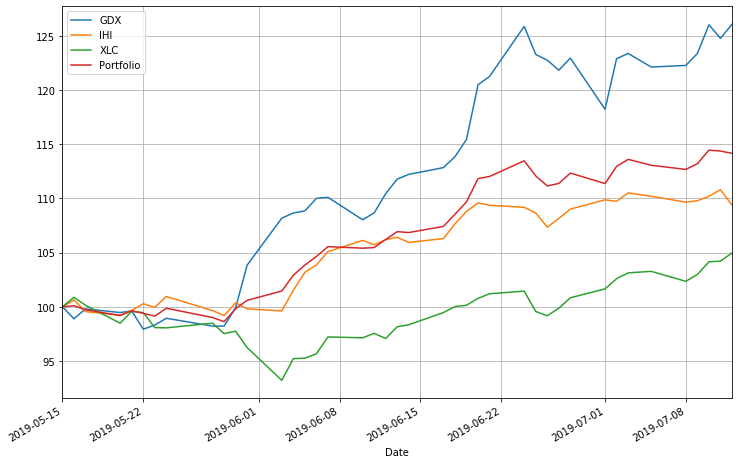

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)